In [1]:
import tweepy
import re
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('dark_background')

In [2]:
consumer_key = "xxi"
consumer_secret = "xx"
access_token = "xx"
access_token_secret = "xx"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
search_words= ("UU ITE | KRITIK")
date_since = "2021-02-14"
new_search = search_words + " -filter:retweets -filter:replies -filter:likes"

tweets = tweepy.Cursor(api.search,
        q=new_search,
        lang="id",
        since=date_since, tweet_mode='extended').items(1000)

items = []
items2 = []
for tweet in tweets:
    item = []
    item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.full_text).split()))
    items.append(item)
    item2 = {}
    item2['date'] = tweet.created_at
    item2['user'] = tweet.user.screen_name
    item2['favorite'] = tweet.favorite_count
    item2['retweet_num'] = tweet.retweet_count
    item2['tweet'] = tweet.full_text
    clean_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.full_text).split())
    item2['tweet'] = clean_tweet
    item2['tweet'] = item2['tweet'].lower()
    items2.append(item2)

hasil = pd.DataFrame(data=items, columns=['tweet'])
hasil['tweet']=hasil['tweet'].str.lower()
hasil2 = pd.DataFrame(data=items2)




In [4]:

S=[]    
pos= open("C:/Users/fikri/Desktop/pyproj/sentimen/positive.txt","r")
pos1 = pos.readlines()
neg= open("C:/Users/fikri/Desktop/pyproj/sentimen/negative.txt","r")
neg1 = neg.readlines()
for item in items:
    count_p = 0
    count_n = 0
    for kata_pos in pos1:
        if kata_pos.strip() in item[0]:
            count_p +=1
    for kata_neg in neg1:
        if kata_neg.strip() in item[0]:
            count_n +=1
    S.append(count_p - count_n)

In [5]:
hasil['value'] = S
hasil['value'].value_counts()

 0     111
-1      70
-2      64
 1      31
-3      30
-4      24
-6      14
-5      11
 2       9
 3       9
-7       5
 4       3
-10      1
 5       1
Name: value, dtype: int64

In [6]:
hasil

,tweet,value
0,acara mata najwa membahas kritik tanpa intrik ...,-2
1,acara mata najwa membahas kritik tanpa intrik ...,-2
2,acara mata najwa membahas kritik tanpa intrik ...,-2
3,acara mata najwa membahas kritik tanpa intrik ...,-2
4,acara mata najwa membahas kritik tanpa intrik ...,-2
...,...,...
378,indonesia sebagian besar pendidikan sma ke baw...,2
379,gegara uu ite masyarakat ogah kritik pemerintah,1
380,permasalahin soal takut kena uu ite kalo kriti...,-6
381,preeet rindu di demo aja selalu kabur apalagi ...,4


In [7]:
hasil2

,date,user,favorite,retweet_num,tweet
0,2021-02-17 13:55:02,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
1,2021-02-17 13:54:57,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
2,2021-02-17 13:54:56,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
3,2021-02-17 13:51:52,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
4,2021-02-17 13:51:44,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
...,...,...,...,...,...
378,2021-02-14 04:31:52,FarizYudhistira,0,0,indonesia sebagian besar pendidikan sma ke baw...
379,2021-02-14 03:45:33,idntimes,2,1,gegara uu ite masyarakat ogah kritik pemerintah
380,2021-02-14 03:44:26,def_pistols,0,0,permasalahin soal takut kena uu ite kalo kriti...
381,2021-02-14 02:27:09,Marwah_Bangsa,14,2,preeet rindu di demo aja selalu kabur apalagi ...


In [9]:
hasil = hasil.reset_index()
hasil2 = hasil2.reset_index()

In [10]:
hasil = hasil.merge(hasil2, left_on='index',right_on='index',how="left")
hasil

,index,tweet_x,value,date,user,favorite,retweet_num,tweet_y
0,0,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:55:02,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
1,1,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:54:57,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
2,2,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:54:56,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
3,3,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:51:52,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
4,4,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:51:44,mukt133tmr,0,0,acara mata najwa membahas kritik tanpa intrik ...
...,...,...,...,...,...,...,...,...
378,378,indonesia sebagian besar pendidikan sma ke baw...,2,2021-02-14 04:31:52,FarizYudhistira,0,0,indonesia sebagian besar pendidikan sma ke baw...
379,379,gegara uu ite masyarakat ogah kritik pemerintah,1,2021-02-14 03:45:33,idntimes,2,1,gegara uu ite masyarakat ogah kritik pemerintah
380,380,permasalahin soal takut kena uu ite kalo kriti...,-6,2021-02-14 03:44:26,def_pistols,0,0,permasalahin soal takut kena uu ite kalo kriti...
381,381,preeet rindu di demo aja selalu kabur apalagi ...,4,2021-02-14 02:27:09,Marwah_Bangsa,14,2,preeet rindu di demo aja selalu kabur apalagi ...


In [12]:
del hasil['tweet_y']
hasil

,index,tweet_x,value,date,user,favorite,retweet_num
0,0,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:55:02,mukt133tmr,0,0
1,1,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:54:57,mukt133tmr,0,0
2,2,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:54:56,mukt133tmr,0,0
3,3,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:51:52,mukt133tmr,0,0
4,4,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 13:51:44,mukt133tmr,0,0
...,...,...,...,...,...,...,...
378,378,indonesia sebagian besar pendidikan sma ke baw...,2,2021-02-14 04:31:52,FarizYudhistira,0,0
379,379,gegara uu ite masyarakat ogah kritik pemerintah,1,2021-02-14 03:45:33,idntimes,2,1
380,380,permasalahin soal takut kena uu ite kalo kriti...,-6,2021-02-14 03:44:26,def_pistols,0,0
381,381,preeet rindu di demo aja selalu kabur apalagi ...,4,2021-02-14 02:27:09,Marwah_Bangsa,14,2


In [15]:
hasil.sort_values(['favorite'],ascending=False)

,index,tweet_x,value,date,user,favorite,retweet_num
374,374,kritik aman sesuai dengan uu ite itu ya tidak ...,0,2021-02-14 07:31:47,ReflyHZ,9187,2504
338,338,jokowi minta dikritik jk bagaimana caranya kri...,-3,2021-02-14 14:05:50,LOVE_AG4EVER,1301,320
362,362,kritik aman sesuai uu ite tukar dulu tempurung...,3,2021-02-14 09:26:16,rockygerung_rg,886,143
264,264,pak jk ngasih kode tiba tiba ada wacana uu ite...,-4,2021-02-15 18:05:44,HusinShihab,680,161
57,57,bertahun tahun warga teriak kebebasan sipil di...,1,2021-02-17 04:06:14,raviopatra,606,237
...,...,...,...,...,...,...,...
251,251,jadi tuh ribut2 soal kritik dan polemik din sy...,-6,2021-02-15 22:47:25,faisalabdalla,0,0
109,109,aneh orang tua itu seolah tidak bisa membedaka...,-5,2021-02-16 11:32:50,SamideriH,0,0
107,107,definisikan dulu secara ajeg kritik dan ujaran...,-2,2021-02-16 12:02:50,kompasiana,0,0
255,255,saat kritik menjadi hal yang begitu penting se...,-1,2021-02-15 20:13:08,ekopriyobondowo,0,0


In [39]:
import seaborn as sns
hasil['sentimen'] = np.where(hasil['value'] == 0 , 'netral',np.where(hasil['value'] < 0 , 'negatif' , 'positif'))


,index,tweet_x,value,date,user,favorite,retweet_num,sentimen
14,14,amnesty international meminta jokowi membebask...,0,2021-02-17 12:55:29,NKRIndonesia79,0,1,netral
15,15,streaming trans 7 mata najwa 17 februari ada a...,0,2021-02-17 12:54:44,tribunkaltim,0,0,netral
18,18,baru aja beberapa lalu bahas soal kritik uu it...,0,2021-02-17 12:16:40,arusbalikk,0,0,netral
21,21,amnesty international meminta jokowi membebask...,0,2021-02-17 11:32:47,MCAOps,270,81,netral
22,22,mulut terbungkam masker kritik terbungkam uu ite,0,2021-02-17 11:15:55,AlifieaY,1,0,netral
...,...,...,...,...,...,...,...,...
367,367,ini tips kritik pemerintah tanpa harus kena uu...,0,2021-02-14 08:08:31,EramuslimOffic1,0,0,netral
370,370,dul konten cuitan kyk gini sejak 2014 ada ratu...,0,2021-02-14 08:00:39,Byy_wislert,0,0,netral
371,371,tips kritik pemerintah tanpa harus kena uu ite...,0,2021-02-14 08:00:01,NetworkFajar1,1,0,netral
374,374,kritik aman sesuai dengan uu ite itu ya tidak ...,0,2021-02-14 07:31:47,ReflyHZ,9187,2504,netral


In [57]:
user_df = hasil.groupby('user')['favorite','retweet_num','value'].sum().reset_index().sort_values(['favorite','retweet_num','value'],ascending=False)
user_df


c:\users\fikri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,user,favorite,retweet_num,value
129,ReflyHZ,9187,2504,0
88,LOVE_AG4EVER,1301,320,-3
299,rockygerung_rg,886,143,3
65,HusinShihab,680,161,-4
294,raviopatra,606,237,1
...,...,...,...,...
324,wisnuwi93338656,0,0,-6
330,yoesoefay,0,0,-6
142,SalehRamli1,0,0,-7
256,lwyrcrparte,0,0,-7


In [ ]:
hasil.value_counts('sentimen')


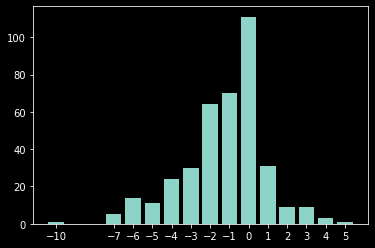

In [23]:
labels, counts = np.unique(hasil["value"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()


In [ ]:
hasil[hasil["value"] == 0 ]

In [28]:
from datetime import datetime, timedelta 
hasil['date_only']= hasil['date'].dt.date
hasil['hour']=hasil['date'].dt.hour
hasil

,index,tweet_x,value,date,user,favorite,retweet_num,sentimen,date_only,hour
0,0,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 20:55:02,mukt133tmr,0,0,negatif,2021-02-17,20
1,1,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 20:54:57,mukt133tmr,0,0,negatif,2021-02-17,20
2,2,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 20:54:56,mukt133tmr,0,0,negatif,2021-02-17,20
3,3,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 20:51:52,mukt133tmr,0,0,negatif,2021-02-17,20
4,4,acara mata najwa membahas kritik tanpa intrik ...,-2,2021-02-17 20:51:44,mukt133tmr,0,0,negatif,2021-02-17,20
...,...,...,...,...,...,...,...,...,...,...
378,378,indonesia sebagian besar pendidikan sma ke baw...,2,2021-02-14 11:31:52,FarizYudhistira,0,0,positif,2021-02-14,11
379,379,gegara uu ite masyarakat ogah kritik pemerintah,1,2021-02-14 10:45:33,idntimes,2,1,positif,2021-02-14,10
380,380,permasalahin soal takut kena uu ite kalo kriti...,-6,2021-02-14 10:44:26,def_pistols,0,0,negatif,2021-02-14,10
381,381,preeet rindu di demo aja selalu kabur apalagi ...,4,2021-02-14 09:27:09,Marwah_Bangsa,14,2,positif,2021-02-14,9


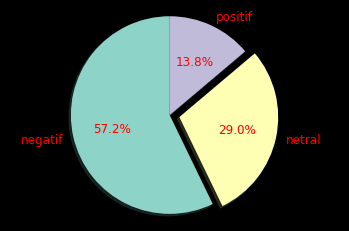

In [71]:
sentimen2 = hasil['sentimen'].value_counts().reset_index()
sentimen2

explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sentimen2['sentimen'], explode=explode, labels=sentimen2['index'], autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'color':"red",'size': '12'})

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [37]:
date_sentimen = hasil.groupby(['date_only','sentimen']).count().reset_index()
df_date = date_sentimen[['date_only','sentimen','index']]
df_date


,date_only,sentimen,index
0,2021-02-14,negatif,29
1,2021-02-14,netral,17
2,2021-02-14,positif,9
3,2021-02-15,negatif,29
4,2021-02-15,netral,21
5,2021-02-15,positif,9
6,2021-02-16,negatif,108
7,2021-02-16,netral,53
8,2021-02-16,positif,24
9,2021-02-17,negatif,53


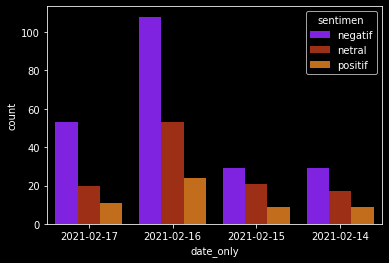

In [42]:
sns.countplot(x='date_only' ,hue='sentimen', data=hasil ,palette = 'gnuplot')
plt.show()

In [47]:
hour_sentimen = hasil.groupby(['hour','sentimen']).count().reset_index()
hour_sentimen
df_hour = hour_sentimen[['hour','sentimen','index']].sort_values('hour',ascending=True)
df_hour

,hour,sentimen,index
0,0,negatif,5
1,0,positif,1
2,1,negatif,6
3,1,netral,2
4,2,negatif,2
...,...,...,...
58,22,negatif,5
60,22,positif,1
62,23,netral,4
61,23,negatif,5


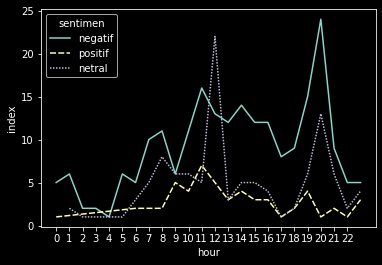

In [53]:
g = sns.lineplot(data=df_hour, x="hour", y="index", hue="sentimen", style="sentimen")
g.set_xticks(range(23))
plt.show()

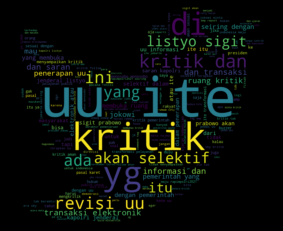

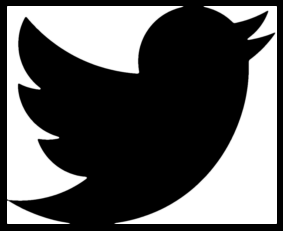

In [88]:
from PIL import Image
from os import path
allword = ' '.join([twt for twt in hasil['tweet_x']])
mask = np.array(Image.open(path.join('C:/Users/fikri/Pictures/M2jeo.jpg')))
wordCLoud =  WordCloud(background_color="black",width = 800 , height = 800, contour_width=3, random_state=21,max_font_size=400,mask=mask).generate(allword)

# store to file
wordCLoud.to_file(path.join('C:/Users/fikri/Pictures/twitter.jpg'))

# show
plt.imshow(wordCLoud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()